# "RealTime Stock Visualizer - Binance API"
> "Real time stock visualizer using Binance API"

- toc: true
- branch: master
- badges: true
- comments: true
- author: Fernando Canepari
- categories: [fastpages, jupyter, stocks, Binance, API]

In [16]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
from binance import Client
import datetime as dt

%matplotlib notebook

In [17]:
api_key = 'yor_key'
api_secret = 'your secret'

client = Client(api_key, api_secret)

In [18]:
asset = 'BTCUSDT'


def getminutedata(symbol, interval, lookback):
    frame = pd.DataFrame(client.get_historical_klines(symbol, interval, lookback))
    frame = frame.iloc[:,:6]
    frame.columns = ['Time','Open','High','Low','Close','Volume']
    frame = frame.set_index('Time')
    frame.index = pd.to_datetime(frame.index, unit='ms')
    frame = frame.astype(float)
    return frame    

def animate(i):
    
    data = getminutedata(asset, '1m', '120m')
    plt.cla()
    plt.plot(data.index, data.Close)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title(asset)
    plt.gcf().autofmt_xdate()
    plt.tight_layout()

<IPython.core.display.Javascript object>


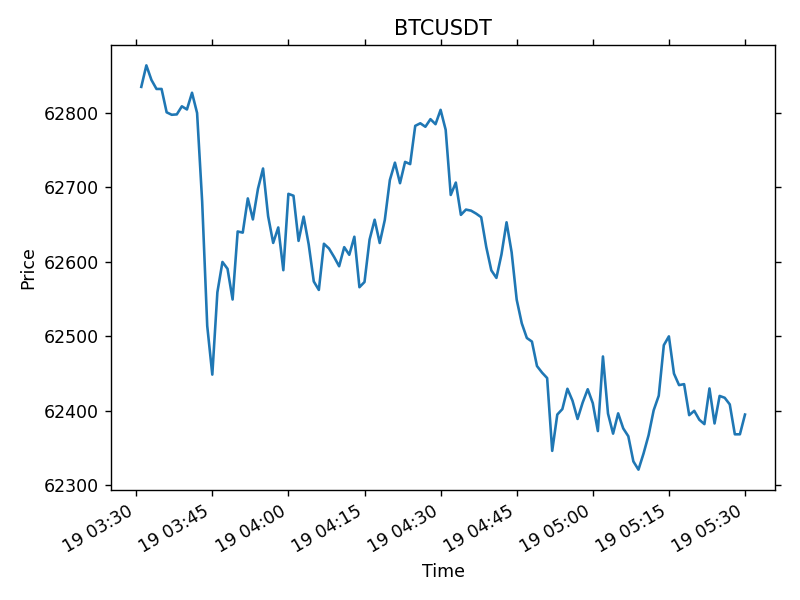

In [19]:
df = getminutedata(asset, '1m', '120m')

ani = FuncAnimation(plt.gcf(), animate, 1000)

plt.tight_layout()
plt.show()